# Visualization

`xyzpy` has two functions for visualizing arrays that are focused on quickly getting an overview of the values, and unlike plots don't require or assume any particular relationship between the dimensions. Think of these as visual pretty print functions. They are:

- [`visualize_matrix`](xyzpy.visualize_matrix): for 2D or 1D arrays or sequences of arrays
- [`visualize_tensor`](xyzpy.visualize_tensor): for ND arrays or sequences of arrays

In [1]:
%config InlineBackend.figure_formats = ['svg']
import numpy as np
import xyzpy as xyz

rng = np.random.default_rng(42)

## Visualizing matrices

[`visualize_matrix`](xyzpy.visualize_matrix) is for 2D or 1D arrays or sequences of arrays. It is a wrapper around [`matplotlib.pyplot.imshow`](matplotlib.pyplot.imshow)
 that adds some convenient and consistent defaults and a few extra features.

For real arrays it shows positive numbers as blue and negative numbers as orange, the maximum magnitude is displayed below the legend (colorbar). By default the alpha channel is also mapped to magnitude, so that the more transparent a pixel is, the closer to zero the value is. This can be disabled with the ``alpha_map`` argument.

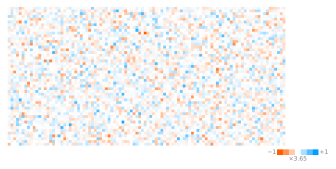

In [2]:
x = rng.normal(size=(50, 100))
xyz.visualize_matrix(x);

For complex matrices a color wheel is used, with positive imaginary values shown as green and negative imaginary values shown as pink. The magnitude is still shown below the legend, and the alpha channel is mapped to magnitude as with real matrices.

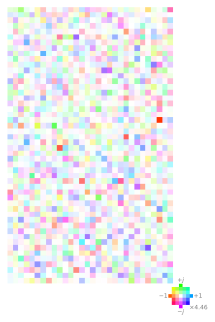

In [3]:
x = rng.normal(size=(50, 30)) + 1j * rng.normal(size=(50, 30))
xyz.visualize_matrix(x);

If you supply a sequence of arrays, they will shown as a row of images, sharing the same magnitude scale and legend (colorbar). 1D arrays shown as diagonal matrices.

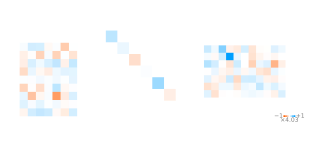

In [4]:
fig, axs = xyz.visualize_matrix([
    rng.normal(size=(10, 7)),
    rng.normal(size=(7)),
    rng.normal(size=(7, 11)),
])

More examples can be found here: {ref}`ex_viz_linalg`.

## Visualizing tensors

[`visualize_tensor`](xyzpy.visualize_tensor) is for ND arrays or sequences of arrays. It works by assigning an angle and associated unit vector to each dimension. The values are then drawn as circles on a grid which connects all neighboring points. The color of each circle, as with [`visualize_matrix`](xyzpy.visualize_matrix), is mapped to the magnitude and sign or phase of the number.

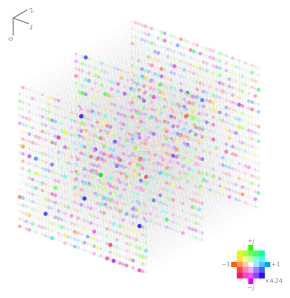

In [5]:
x = rng.normal(size=(20, 40, 3)) + 1j * rng.normal(size=(20, 40, 3))

# the compass kwarg shows which angles correspond to which dimensions
xyz.visualize_tensor(x, compass=True);

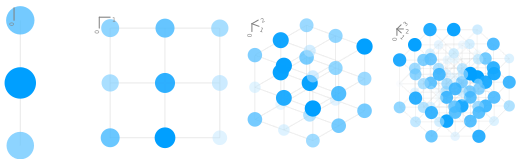

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(10, 2.5))
fig.patch.set_alpha(0)

for i, ax in enumerate(axs, 1):
    x = rng.uniform(size=[3] * i)
    xyz.visualize_tensor(x, ax=ax, legend=False, compass=True)


While the plots can get very busy for higher dimensions, they can still be useful for getting a quick overview of the values in a tensor:

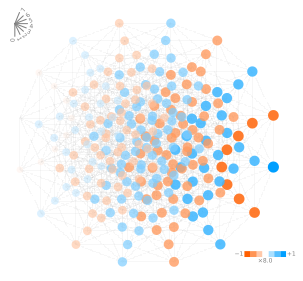

In [7]:
shape = (2,) * 8

x = np.ones(shape)
x *= np.indices(shape).sum(0)
x[(np.indices(shape).sum(0) % 2) == 1] *= -1

xyz.visualize_tensor(x, compass=True);

To avoid aliasing / overlapping points, a slight skew is applied to the angles and scales mapped to each dimension, these can be controlled with the ``skew_angle_factor`` and ``skew_scale_factor`` arguments, for example turning the effect off:

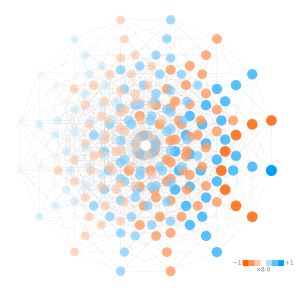

In [8]:
xyz.visualize_tensor(x, skew_angle_factor=0, skew_scale_factor=0);

As an alternative to assigning a seperate angle to each dimension, you can also specify a maximum number of angles, or 'projections', and then multiple dimensions will be assigned to the same angle but with different scales (like fusing those axes).

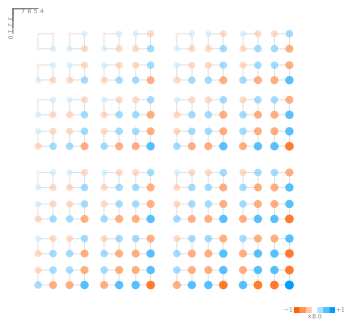

In [9]:
# max_projections=2 results in a matrix like visualization
xyz.visualize_tensor(x, compass=True, max_projections=2);

This matches up with the data layout if the axes were actually fused (reshaped):

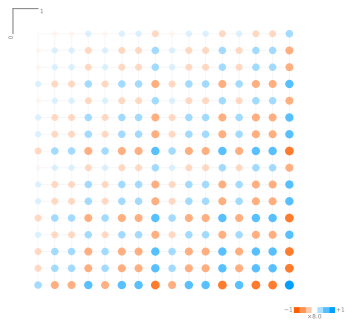

In [10]:
xyz.visualize_tensor(x.reshape(16, 16), compass=True);